<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SqaureWaveform_2Level_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Spectrum of 2-Level Square Waveform  </h1></b>

Dr. Bingsen Wang

10/30/2024
</center>

#Python Code

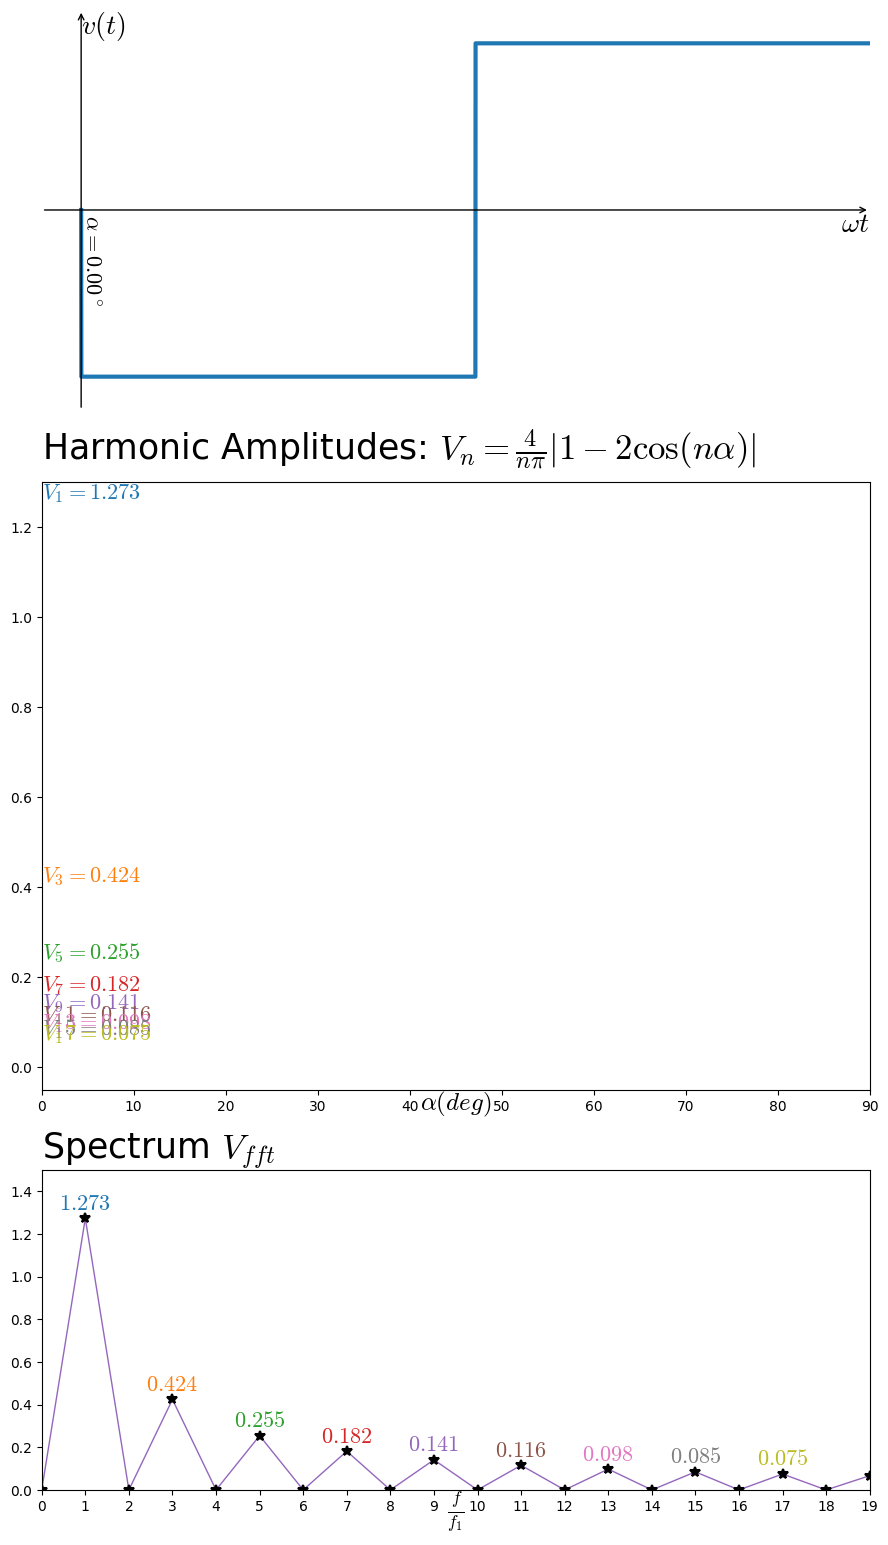

In [23]:
from os import linesep
import numpy as np
from numpy import linspace,logspace,cos,sin,pi,heaviside,fft,angle,abs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
#functions
def v(wt,alpha): #square waveform with firing angle theta in deg
  return (heaviside(sin(wt),0)*2-1)*heaviside(abs(sin(wt))-sin(alpha/180*pi),0)

def Vn(alpha,n):
  return 4/(pi*n)*abs(1-2*cos(n*alpha/180*pi))

def spectrum(xt): #spectrum - magnitude and angle
  xfft = fft.rfft(xt)
  xfft_angle = angle(xfft)
  xfft_mag = abs(xfft)/len(xt)*2
  xfft_mag[0]=xfft_mag[0]*0.5 #adjust the dc component
  return xfft_mag,xfft_angle

#parameters
Nf = 250 # number of frames
fm = 1 # fundamental frequency
fc = 50*fm # switching frequency
Np = 4096*2 # number of points for time series
alpha = linspace(0,90,Nf)
t=linspace(0,1/fm,Np)
wt=2*pi*fm*t
fser = linspace(0,int(Np/2),int(Np/2)+1)#frequency series
# print(fser[:20])
#set up figures
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_frame = [[[.05,.725, .92,.25], [-.1*pi,2*pi], [-1.2,1.2]], # v(t)
            [[.05,.3,.92,.38], [0,90], [-.05,1.3]], # V1,3,5,....
            [[.05, 0.05, .92,.2], [0,19], [0,1.5]], # V_fft
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl = [['$v(t)$', r'$\omega t$'],
          [r'Harmonic Amplitudes: $V_n=\frac{4}{n\pi}|1-2\cos(n\alpha)|$',r'$\alpha (deg)$'],
          ['Spectrum $V_{fft}$',r'$\frac{f}{f_1}$']]
clst = list(mpl.cm.tab10.colors) #colors of lines
ax_lst,ylabels=[],[]
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax_lst.append(ax)
  if k<1:
    ax.axis('off') #turn off axis frames
    ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
    ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
    ax.text(xm,0,ax_lbl[k][-1],size=20, va='top', ha='right') #x-axis label
    ylabels.append(ax.text(0,ym,ax_lbl[k][0], size=20)) #y-axis label
  else:
    ax.text(.5*xm,yn,ax_lbl[k][-1],size=18, va='top', ha='center') #x-axis label
    ylabels.append(ax.text(0,ym+.05,ax_lbl[k][0], size=25)) #y-axis label

line_vt = ax_lst[0].plot([],[],color=clst[0],lw=3)[0] #square waveform
lines_Vn = [ax_lst[1].plot([],[],color=clst[k],lw=3)[0] for k in range(9)] #square waveform
line_Vfft = ax_lst[-1].plot([],[],color=clst[4],lw=1,marker='*',mew=1.5,
                             mec='k',mfc='k',ms=7)[0] #spectrum
ylabels[0].set_va('top')
ax_lst[-1].set_xticks(linspace(0,19,20))
texts_alpha=ax_lst[0].text(0,0,'',size=16,va='top',rotation=-90)
texts_Vn=[ax_lst[1].text(0,0,'',size=16,va='center',color=clst[k]) for k in range(9)]
# ax_lst[1].text(32,1.26,r'',size=25,va='top',ha='center')
texts_spectr=[ax_lst[-1].text(0,0,'',size=16,ha='center',color=clst[k]) for k in range(9)]

def animate(i):
  vt = v(wt,0)-2*v(wt,alpha[i])
  texts_alpha.set_position([alpha[i]/180*pi,-.03])
  texts_alpha.set_text(rf'$\alpha={alpha[i]:.2f}^\circ$')
  v_fft = spectrum(vt)
  line_vt.set_data(wt,vt)
  line_Vfft.set_data(fser[:20],v_fft[0][:20])
  for k in range(9):
    lines_Vn[k].set_data(alpha[:i+1],Vn(alpha[:i+1],2*k+1))
    texts_Vn[k].set_position([alpha[i],Vn(alpha[i],2*k+1)])
    texts_Vn[k].set_text(f'$V_{2*k+1:.0f}={Vn(alpha[i],2*k+1):.3f}$')
    texts_spectr[k].set_position([fser[k*2+1],v_fft[0][k*2+1]+.04])
    texts_spectr[k].set_text(f'${v_fft[0][k*2+1]:.3f}$')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following line
anim.save("SquareWaveformSpectrum_2level.mp4", writer=animation.FFMpegWriter(fps=10), dpi = 200)